# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('build/eval-results.csv')
results.head()

,Partition,Algorithm,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
0,4,PersMean,0.713,4.954,4.076031,4.325807,4.659620,0.719278
1,5,PersMean,0.715,4.963,4.107206,4.359218,0.757764,0.723538
2,4,Custom,0.714,5.378,4.076031,4.325807,4.659620,0.720377
3,5,Custom,0.713,5.381,4.107206,4.359218,0.757764,0.728087
4,5,ItemItem,6.193,8.644,3.883678,4.124895,0.762215,0.722162


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [4]:
agg_results = results.drop(['Partition'], axis=1).groupby('Algorithm').mean()
agg_results

,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,Predict.nDCG,MRR
Algorithm,,,,,,
Custom,0.4484,3.4360,4.087141,4.329409,1.471886,0.728179
ItemItem,4.7400,8.0562,3.870446,4.100073,1.094901,0.725301
PersMean,0.3906,3.4706,4.087141,4.329409,1.471886,0.727118
UserUser,0.0722,7910.2678,3.876921,4.096465,1.133951,0.866969


## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

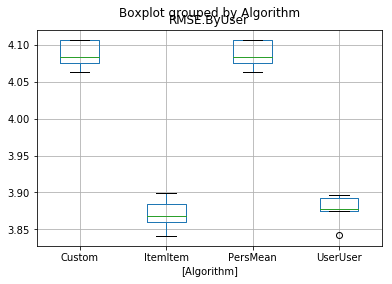

In [5]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm')

Next up: nDCG

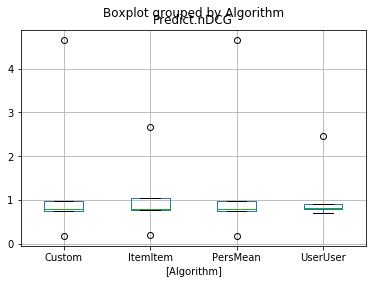

In [8]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm')

Finally, the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10fcf2d30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ff5dcc0>], dtype=object)

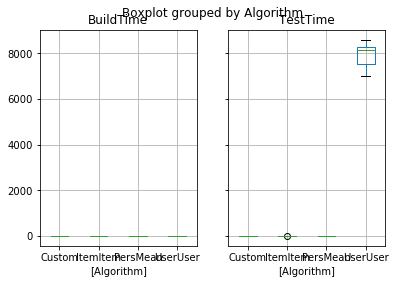

In [9]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm')